In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import VotingRegressor
import pickle

In [232]:
df=pd.read_csv("Coordinates_1000_1.csv")
df1=pd.read_csv("Coordinates_2000_2.csv")

In [167]:
df.head()

,X_coor,Y_coor,left,labels
0,5,46,1,21
1,18,99,0,59
2,1,108,0,67
3,21,111,1,70
4,56,55,0,65


In [168]:
df

,X_coor,Y_coor,left,labels
0,5,46,1,21
1,18,99,0,59
2,1,108,0,67
3,21,111,1,70
4,56,55,0,65
...,...,...,...,...
995,18,52,0,49
996,76,81,1,16
997,9,21,1,9
998,13,69,0,61


In [169]:
x=df.drop('labels',axis=1)
y=df['labels']

In [233]:
x1=df1.drop('labels',axis=1)
y1=df1['labels']

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

## Linear regression

In [171]:
mylm=LinearRegression()

In [172]:
mylm.fit(x_train,y_train)

LinearRegression()

In [173]:
mylm.intercept_

50.19061141378414

In [174]:
coeff_df=pd.DataFrame(mylm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
X_coor,-0.160677
Y_coor,0.021348
left,-15.064184


In [175]:
predictions=mylm.predict(x_test)

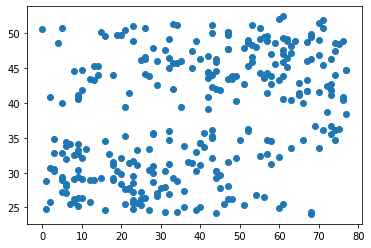

In [176]:
plt.scatter(y_test,predictions)

In [177]:
def adjusted_r2(y_test,predictions):
    n = df.shape[0]
    p = x.shape[1]
    r2 = r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [178]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,predictions))
print("Mean squared error:",metrics.mean_squared_error(y_test,predictions))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R2 Score:",r2_score(y_test,predictions))
print("Adjusted R2 score:",adjusted_r2(y_test,predictions))
print("Accuracy Score:",mylm.score(x_test,y_test))

Mean absolute error: 16.78543081230682
Mean squared error: 405.80065807284683
Mean sqrt error: 20.1444944854133
R2 Score: 0.14927247735412263
Adjusted R2 score: 0.14671004505699659
Accuracy Score: 0.14927247735412263


## Polynomial features

In [179]:
polyconv=PolynomialFeatures(degree=3,include_bias=False)
polyfeat=polyconv.fit_transform(x)

In [180]:
x_poly_train,x_poly_test,y_poly_train,y_poly_test=train_test_split(polyfeat,y,test_size=0.3,random_state=42)

In [181]:
pr=LinearRegression()
pr.fit(x_poly_train,y_poly_train)

LinearRegression()

In [182]:
poly_pred=pr.predict(x_poly_test)

In [183]:
print("Mean absolute error:",metrics.mean_absolute_error(y_poly_test,poly_pred))
print("Mean squared error:",metrics.mean_squared_error(y_poly_test,poly_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_poly_test,poly_pred)))
print("R2 Score:",r2_score(y_poly_test,poly_pred))
print("Adjusted R2 score:",adjusted_r2(y_poly_test,poly_pred))

Mean absolute error: 5.934967871458409
Mean squared error: 65.2881509220906
Mean sqrt error: 8.080108348412823
R2 Score: 0.8698944604750989
Adjusted R2 score: 0.8695025763199034


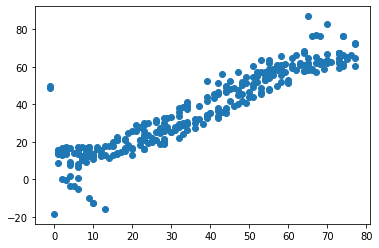

In [184]:
plt.scatter(y_poly_test,poly_pred)

In [240]:
filename = 'ai_model.sav'

In [242]:
pickle.dump(pr, open(filename, 'wb'))

## Lasso regression

In [185]:
lar=LassoCV(eps=0.001,n_alphas=100, max_iter=3000)

In [186]:
lar.fit(x_train,y_train)

LassoCV(max_iter=3000)

In [187]:
lar.alpha_

0.09133578775510195

In [188]:
lass_pred=lar.predict(x_test)

In [189]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,lass_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,lass_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_test,lass_pred)))
print("R2 Score:",r2_score(y_test,lass_pred))
print("Adjusted R2 score:",adjusted_r2(y_test,lass_pred))

Mean absolute error: 16.805023667877013
Mean squared error: 405.9969528399147
Mean sqrt error: 20.149366065460093
R2 Score: 0.14886096160723084
Adjusted R2 score: 0.14629728980484302


##  Polynomial

In [190]:
lar=LassoCV(eps=0.001,n_alphas=100, max_iter=3000)

In [191]:
lar.fit(x_poly_train,y_poly_train)

LassoCV(max_iter=3000)

In [192]:
lar.alpha_

1526.7006798285713

In [193]:
lass_pred=lar.predict(x_poly_test)

In [194]:
print("Mean absolute error:",metrics.mean_absolute_error(y_poly_test,lass_pred))
print("Mean squared error:",metrics.mean_squared_error(y_poly_test,lass_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_poly_test,lass_pred)))
print("R2 Score:",r2_score(y_poly_test,lass_pred))
print("Adjusted R2 score:",adjusted_r2(y_poly_test,lass_pred))

Mean absolute error: 13.044286747168126
Mean squared error: 264.7199382519269
Mean sqrt error: 16.270216293950334
R2 Score: 0.47246889515426627
Adjusted R2 score: 0.4708799460432852


## Ridge regression

In [195]:
rr=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [196]:
rr.fit(x_train,y_train) 

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [197]:
rr_pred=rr.predict(x_test)

In [198]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,rr_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,rr_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))
print("R2 Score:",r2_score(y_test,rr_pred))
print("Adjusted R2 score:",adjusted_r2(y_test,rr_pred))

Mean absolute error: 16.785890094260502
Mean squared error: 405.8047293556187
Mean sqrt error: 20.14459553715633
R2 Score: 0.14926394224645934
Adjusted R2 score: 0.14670148424117768


## Polynomial features

In [199]:
rr=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [200]:
rr.fit(x_poly_train,y_poly_train) 

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [201]:
rr_pred=rr.predict(x_poly_test)

In [202]:
print("Mean absolute error:",metrics.mean_absolute_error(y_poly_test,rr_pred))
print("Mean squared error:",metrics.mean_squared_error(y_poly_test,rr_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_poly_test,rr_pred)))
print("R2 Score:",r2_score(y_poly_test,rr_pred))
print("Adjusted R2 score:",adjusted_r2(y_poly_test,rr_pred))

Mean absolute error: 6.089525942406325
Mean squared error: 76.09566548758582
Mean sqrt error: 8.723282953543684
R2 Score: 0.8483573592766758
Adjusted R2 score: 0.847900604334738


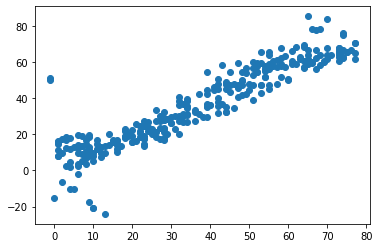

In [203]:
plt.scatter(y_poly_test,rr_pred)

## Elastic net

In [204]:
enr=ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,max_iter=2000)

In [205]:
enr.fit(x_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=2000,
             tol=0.01)

In [206]:
enr.alpha_

0.09133578775510195

In [207]:
enr.l1_ratio_

1.0

In [208]:
ela_pred=enr.predict(x_test)

In [209]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,ela_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,ela_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_test,ela_pred)))
print("R2 Score:",r2_score(y_test,ela_pred))
print("Adjusted R2 score:",adjusted_r2(y_test,ela_pred))

Mean absolute error: 16.805023667877013
Mean squared error: 405.9969528399147
Mean sqrt error: 20.149366065460093
R2 Score: 0.14886096160723084
Adjusted R2 score: 0.14629728980484302


## Polynomial features

In [210]:
enr=ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,max_iter=2000)

In [211]:
enr.fit(x_poly_train,y_poly_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=2000,
             tol=0.01)

In [212]:
enr.alpha_

1526.7006798285713

In [213]:
enr.l1_ratio_

1.0

In [214]:
ela_pred=enr.predict(x_poly_test)

In [215]:
print("Mean absolute error:",metrics.mean_absolute_error(y_poly_test,ela_pred))
print("Mean squared error:",metrics.mean_squared_error(y_poly_test,ela_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_poly_test,ela_pred)))
print("R2 Score:",r2_score(y_poly_test,ela_pred))
print("Adjusted R2 score:",adjusted_r2(y_poly_test,ela_pred))

Mean absolute error: 13.046853941460029
Mean squared error: 264.8005242798469
Mean sqrt error: 16.272692594646003
R2 Score: 0.4723083041665813
Adjusted R2 score: 0.470718871347806


## Voting regressor

In [216]:
lr=LinearRegression()
lar=LassoCV(eps=0.001,n_alphas=100, max_iter=3000)
rr=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
enr=ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,max_iter=2000)

In [217]:
vr=VotingRegressor([('lr',lr),('lar',lar),('rr',rr),('enr',enr)])

In [218]:
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lar', LassoCV(max_iter=3000)),
                            ('rr',
                             RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                     scoring='neg_mean_absolute_error')),
                            ('enr',
                             ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95,
                                                    0.99, 1],
                                          max_iter=2000, tol=0.01))])

In [219]:
vr_pred=vr.predict(x_test)

In [220]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,vr_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,vr_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_test,vr_pred)))
print("R2 Score:",r2_score(y_test,vr_pred))
print("Adjusted R2 score:",adjusted_r2(y_test,vr_pred))

Mean absolute error: 16.79534206058034
Mean squared error: 405.8915853291226
Mean sqrt error: 20.146751235102958
R2 Score: 0.1490818558804171
Adjusted R2 score: 0.1465188494222256


## Polynomial features

In [221]:
lr=LinearRegression()
lar=LassoCV(eps=0.001,n_alphas=100, max_iter=3000)
rr=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
enr=ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,max_iter=2000)

In [222]:
vr=VotingRegressor([('lr',lr),('lar',lar),('rr',rr),('enr',enr)])

In [223]:
vr.fit(x_poly_train,y_poly_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lar', LassoCV(max_iter=3000)),
                            ('rr',
                             RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                     scoring='neg_mean_absolute_error')),
                            ('enr',
                             ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95,
                                                    0.99, 1],
                                          max_iter=2000, tol=0.01))])

In [224]:
vr_pred=vr.predict(x_poly_test)

In [225]:
print("Mean absolute error:",metrics.mean_absolute_error(y_poly_test,vr_pred))
print("Mean squared error:",metrics.mean_squared_error(y_poly_test,vr_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y_poly_test,vr_pred)))
print("R2 Score:",r2_score(y_poly_test,vr_pred))
print("Adjusted R2 score:",adjusted_r2(y_poly_test,vr_pred))

Mean absolute error: 7.896992049805834
Mean squared error: 111.0041882745787
Mean sqrt error: 10.535852517693037
R2 Score: 0.7787920227328547
Adjusted R2 score: 0.7781257336447007


## Testing dataset

In [234]:
polyconv=PolynomialFeatures(degree=3,include_bias=False)
polyfeat=polyconv.fit_transform(x1)

In [235]:
test_pred=pr.predict(polyfeat)

In [236]:
print("Mean absolute error:",metrics.mean_absolute_error(y1,test_pred))
print("Mean squared error:",metrics.mean_squared_error(y1,test_pred))
print("Mean sqrt error:",np.sqrt(metrics.mean_squared_error(y1,test_pred)))
print("R2 Score:",r2_score(y1,test_pred))
print("Adjusted R2 score:",adjusted_r2(y1,test_pred))

Mean absolute error: 6.109207442868285
Mean squared error: 82.93203004186083
Mean sqrt error: 9.106702479045905
R2 Score: 0.8394629253551091
Adjusted R2 score: 0.8389793799495522


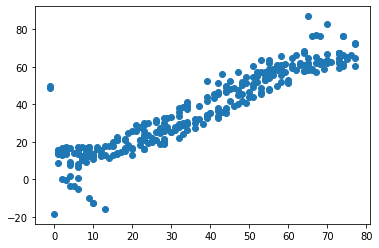

In [237]:
plt.scatter(y_poly_test,poly_pred)